In [1]:
# TAREAS DE LOS MÓDULOS DE CNN Y RNN - MIAX9
# Para cada uno de los siguientes ejercicios entregar un fichero en ipython notebook  (.ipynb).
# En cada fichero tenéis que solucionar un ejercicio distinto, es importante que comentéis la
# solución que habéis realizado y los resultados obtenidos.
# El código ha de ser compilable desde Google Colab (utilizando el entorno de Colab), y no
# ha de contener errores. En los casos en los que se pide entrenar un modelo razona sobre
# la evolución del error de entrenamiento y de validación durante el entrenamiento.
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de
# Instituto BME.

In [2]:
# 6.- Compara el modelo anterior con un modelo que use convoluciones 2D para el mismo
# conjunto de datos reordenando los datos.

In [3]:
# Entiendo que "conjunto de datos reordenando los datos." significa aplicar 
# la funcion que he creado reshape_para_trabajar_conv2D

In [4]:
#from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, LSTM, GRU, MaxPooling1D, Conv2D, MaxPooling2D, Dropout, Bidirectional, Reshape, Activation

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

2.11.0


In [5]:
def datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model):
    salida=np.zeros((17))
    #trainableParams
    salida[0] = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
    #nonTrainableParams
    salida[1] = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
    #totalParams
    salida[2] = salida[0] + salida[1]
    
    #Train
    score = model.evaluate(x_train, t_train)
    salida[3] = score[0]
    salida[4] = score[1]
    y_hat = model.predict(x_train)
    # El  error de la predicion en train
    salida[5] = np.mean(abs(y_hat[:,0]-t_train))
    # La media de error en la prediccion en train 
    salida[6] =np.mean(np.abs(t_train))
    
    #Test
    score = model.evaluate(x_test, t_test)
    salida[7] = score[0]
    salida[8] = score[1]
    y_hat_test = model.predict(x_test)
    # El  error de la predicion en test
    salida[9] = np.mean(abs(y_hat_test[:,0]-t_test))
    # La media de error en la prediccion en test
    salida[10] = np.mean(np.abs(t_test))
    
    # numero de datos de entrada en train
    salida[11] = x_train.shape[0]
    #dimensiones de la entrada
    salida[12] =len(x_train.shape)
    # valor de la dimension 1 de la entrada
    if salida[12] >= 1:
        salida[13] = x_train.shape[0]
    # valor de la dimension 2 de la entrada
    if salida[12] >= 2:
        salida[14] = x_train.shape[1]
    # valor de la dimension 3 de la entrada
    if salida[12] >= 3:
        salida[15] = x_train.shape[2]
    # valor de la dimension 4 de la entrada
    if salida[12] >= 4:
        salida[16] = x_train.shape[3]
    
    print(len(salida))
    
    import pandas as pd 
    df = pd.read_csv ('metricas.csv', index_col=0) 
    print(df.shape)
    df[model_title] = salida
    df.to_csv('metricas.csv') 

    return salida, df


In [6]:
def sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    
    
    dd_amzn = pd.read_csv("amzn.us.txt", delimiter=",")
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    dd_fb = pd.read_csv("fb.us.txt", delimiter=",")
    dd_aapl = pd.read_csv("aapl.us.txt", delimiter=",")
    dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
    
    
    amzn_op = dd_amzn['Open'].values
    msft_op = dd_msft['Open'].values
    fb_op = dd_fb['Open'].values
    aapl_op = dd_aapl['Open'].values
    googl_op = dd_googl['Open'].values
    
    print(amzn_op.shape)
    print(msft_op.shape)
    print(fb_op.shape)
    print(aapl_op.shape)
    print(googl_op.shape)
    
    # Como no coinciden en el tiempo los 5 valores me cojo solo los que coinciden
    # Primero me los ordeno teniendo en cuenta la fecha
    aa = dd_amzn['Date'].values #
    amzn_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        amzn_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #


    aa = dd_msft['Date'].values #
    msft_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        msft_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_fb['Date'].values #
    fb_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_aapl['Date'].values #
    aapl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        aapl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_googl['Date'].values #
    googl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10)) 
    
    
    # Los ploteo y veo que hay un tramo en el coinciden las fechas
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax1.plot(amzn_indice,amzn_op, label='amzn_indice,amzn_op')
    ax1.plot(msft_indice,msft_op, label='msft_indice,msft_opp')
    ax1.plot(fb_indice,fb_op, label='fb_indice,fb_op')
    ax1.plot(aapl_indice,aapl_op, label='aapl_indice,aapl_op')
    ax1.plot(googl_indice,googl_op, label='googl_indice,googl_op')
    ax1.legend()
    
    # Me quedo solo las fechas que coinciden
    indices = set(amzn_indice) & set(msft_indice) & set(fb_indice) & set(aapl_indice) & set(aapl_indice)

    ii = np.in1d(amzn_indice,list(indices))
    data_amzn = amzn_op[ii]
    ii = np.in1d(msft_indice,list(indices))
    data_msft = msft_op[ii]
    ii = np.in1d(fb_indice,list(indices))
    data_fb = fb_op[ii]
    ii = np.in1d(aapl_indice,list(indices))
    data_aapl = aapl_op[ii]
    ii = np.in1d(googl_indice,list(indices))
    data_googl = googl_op[ii]



    # Los ploteo y ahora síí coinciden en todo el tramo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax2.plot(data_amzn, label='data_amzn')
    ax2.plot(data_msft, label='data_msft')
    ax2.plot(data_fb, label='data_fb')
    ax2.plot(data_aapl, label='data_aapl')
    ax2.plot(data_googl, label='data_googl')
    ax2.legend()
    
    # Los coloco todos juntos en un dataset
    DAT = np.zeros((data_googl.shape[0],5))
    DAT[:,1] = data_amzn
    DAT[:,0] = data_msft
    DAT[:,2] = data_fb
    DAT[:,3] = data_aapl
    DAT[:,4] = data_googl

    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax3.plot(DAT[:,0], label='data_msft')
    ax3.plot(DAT[:,1], label='data_amzn')
    ax3.plot(DAT[:,2], label='data_fb')
    ax3.plot(DAT[:,3], label='data_aapl')
    ax3.plot(DAT[:,4], label='data_googl')
    ax3.legend()
    
    #normalizo de 0 a 1.
    DAT[:,0] = DAT[:,0]/DAT[:,0].max()
    DAT[:,1] = DAT[:,1]/DAT[:,1].max()
    DAT[:,2] = DAT[:,2]/DAT[:,2].max()
    DAT[:,3] = DAT[:,3]/DAT[:,3].max()
    DAT[:,4] = DAT[:,4]/DAT[:,4].max()
    
    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax4.plot(DAT[:,0], label='data_msft')
    ax4.plot(DAT[:,1], label='data_amzn')
    ax4.plot(DAT[:,2], label='data_fb')
    ax4.plot(DAT[:,3], label='data_aapl')
    ax4.plot(DAT[:,4], label='data_googl')
    ax4.legend()

    
    return DAT



In [7]:
def sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    
    
    dd_amzn = pd.read_csv("amzn.us.txt", delimiter=",")
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    dd_fb = pd.read_csv("fb.us.txt", delimiter=",")
    dd_aapl = pd.read_csv("aapl.us.txt", delimiter=",")
    dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
    
    
    amzn_op = dd_amzn['Open'].values
    msft_op = dd_msft['Open'].values
    fb_op = dd_fb['Open'].values
    aapl_op = dd_aapl['Open'].values
    googl_op = dd_googl['Open'].values
    
    print(amzn_op.shape)
    print(msft_op.shape)
    print(fb_op.shape)
    print(aapl_op.shape)
    print(googl_op.shape)
    
    # Como no coinciden en el tiempo los 5 valores me cojo solo los que coinciden
    # Primero me los ordeno teniendo en cuenta la fecha
    aa = dd_amzn['Date'].values #
    amzn_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        amzn_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #


    aa = dd_msft['Date'].values #
    msft_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        msft_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_fb['Date'].values #
    fb_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_aapl['Date'].values #
    aapl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        aapl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_googl['Date'].values #
    googl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10)) 
    
    
    # Los ploteo y veo que hay un tramo en el coinciden las fechas
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax1.plot(amzn_indice,amzn_op, label='amzn_indice,amzn_op')
    ax1.plot(msft_indice,msft_op, label='msft_indice,msft_opp')
    ax1.plot(fb_indice,fb_op, label='fb_indice,fb_op')
    ax1.plot(aapl_indice,aapl_op, label='aapl_indice,aapl_op')
    ax1.plot(googl_indice,googl_op, label='googl_indice,googl_op')
    ax1.legend()
    
    # Me quedo solo las fechas que coinciden
    indices = set(amzn_indice) & set(msft_indice) & set(fb_indice) & set(aapl_indice) & set(aapl_indice)

    ii = np.in1d(amzn_indice,list(indices))
    data_amzn = amzn_op[ii]
    ii = np.in1d(msft_indice,list(indices))
    data_msft = msft_op[ii]
    ii = np.in1d(fb_indice,list(indices))
    data_fb = fb_op[ii]
    ii = np.in1d(aapl_indice,list(indices))
    data_aapl = aapl_op[ii]
    ii = np.in1d(googl_indice,list(indices))
    data_googl = googl_op[ii]



    # Los ploteo y ahora síí coinciden en todo el tramo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax2.plot(data_amzn, label='data_amzn')
    ax2.plot(data_msft, label='data_msft')
    ax2.plot(data_fb, label='data_fb')
    ax2.plot(data_aapl, label='data_aapl')
    ax2.plot(data_googl, label='data_googl')
    ax2.legend()
    
    # Los coloco todos juntos en un dataset
    DAT = np.zeros((data_googl.shape[0],5))
    DAT[:,1] = data_amzn
    DAT[:,0] = data_msft
    DAT[:,2] = data_fb
    DAT[:,3] = data_aapl
    DAT[:,4] = data_googl

    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax3.plot(DAT[:,0], label='data_msft')
    ax3.plot(DAT[:,1], label='data_amzn')
    ax3.plot(DAT[:,2], label='data_fb')
    ax3.plot(DAT[:,3], label='data_aapl')
    ax3.plot(DAT[:,4], label='data_googl')
    ax3.legend()
    

    # Hacemos el log y la rentabilidad para que no haya correlacion entre los valores y 
    # para remover la heterocedasticidad.
    #Aplico el retorno logaritmico
    DAT_1 = np.diff(np.log(DAT),axis=0)
    #DAT_1[:,0] = np.diff(np.log(DAT[:,0]),axis=0)
    #DAT_1[:,1] = np.diff(np.log(DAT[:,1]),axis=0)
    #DAT_1[:,2] = np.diff(np.log(DAT[:,2]),axis=0)
    #DAT_1[:,3] = np.diff(np.log(DAT[:,3]),axis=0)
    #DAT_1[:,4] = np.diff(np.log(DAT[:,4]),axis=0)
    
    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax4.plot(DAT_1[:,0], label='data_msft')
    ax4.plot(DAT_1[:,1], label='data_amzn')
    ax4.plot(DAT_1[:,2], label='data_fb')
    ax4.plot(DAT_1[:,3], label='data_aapl')
    ax4.plot(DAT_1[:,4], label='data_googl')
    ax4.legend()
    
    return DAT_1

In [8]:
def Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG,DAT_1):
    # Reordeno el dataset para hacer bloques de LAG dias
    #LAG = 11
    DAT_TS = np.zeros((DAT_1.shape[0]-LAG,LAG,DAT_1.shape[1]))

    for ii in range(0,DAT_1.shape[0]-LAG):
        #print(DAT_TS.shape)
        #print(DAT_1.shape)
        DAT_TS[ii,:,:] = DAT_1[ii:ii+LAG,:]
    # Tengo (#muestras,#longitud,#variables)

    #Separaro todo el dataset en los datos de apertura de 10 días anteriores para estimar el valor del día
    #actual
    #Ntr = np.floor(DAT_TS.shape[0]/2)
    Ntr = np.floor(DAT_TS.shape[0])
    data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]

    Y_target = 0
    data_y = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]

    #hago el split de train y test
    from sklearn.model_selection import train_test_split
    x_train, x_test, t_train, t_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)
    return x_train, x_test, t_train, t_test



In [9]:
# Entiendo que "conjunto de datos reordenando los datos." significa aplicar 
# la funcion que he creado reshape_para_trabajar_conv2D
def reshape_para_trabajar_conv2D (x_train,x_test):
    # Modifico las dimensiones para poder usar convoluciones 2D
    # Para eso incluyo una dimension de canales al final
    x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
    x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
    return x_train, x_test


In [10]:
# Evaluamos el modelo segun los datos mas generales para evaluarlo
# PARA USARLO PARA EL TFM; COMPLETO CON accuracy Y val_accuracy AUNQUE NO ES EJERCICIO
# DE CLASIFICAION Y VALERO DIJO QUE accuracy SOLO LO VIERAMOS EN EJERCICIOS DE CLASIFICION

def graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist):
    import matplotlib.pyplot as plt
    %matplotlib inline
    #Train
    score = model.evaluate(x_train, t_train)
    print('SCORE DE TRAIN:')
    print(score)

    #Test
    print('SCORE DE TEST:')
    score_1 = model.evaluate(x_test, t_test)
    print(score_1)

    n_epochs = len(hist.history['loss'])
    hd = hist.history
    epochs = range(1, n_epochs+1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, hd['accuracy'], "r", label="train")
    plt.plot(epochs, hd['val_accuracy'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()
    plt.show()
    return score, score_1

In [11]:
# Cree esta funcion segun lo que Valero son ensenaba en clase
# PARA USARLO PARA EL TFM;

def ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model):
    
    #ESTUDIO GRAFICO DE RESULTADOS PARA EVALUAR
    # Evaluamos el modelo en train
    score = model.evaluate(x_train, t_train, verbose=0)
    print(f'Evaluamos el modelo en train_score: {score}')

    # Predecimos con los datos de train
    y_hat = model.predict(x_train)
    print(f'Predecimos con los datos de train: {np.mean(abs(y_hat[:,0]-t_train))}')
    print(f'Predecimos con los datos de train_cantidad/dimensiones de datos:{y_hat.shape}')
    print(f' La media de error en la prediccion en entrenamiento es: {np.mean(np.abs(t_train))}')

    # Predecimos con los datos de test
    y_hat_test = model.predict(x_test)
    print(f' El  error de la predicion usando datos de test es de : {np.mean(abs(y_hat_test[:,0]-t_test))}')
    print(f' La media de error en la prediccion en test es: {np.mean(np.abs(t_test))}')

    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(20, 10)) 
    # Mostramos las predicciones de entrenamiento
    print(f'Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:')

    #plt.figure()
    ax1.plot(y_hat[:,0], label='y_hat[:,0] datos')    
    ax1.plot(t_train, label='t_train predicciones')
    ax1.grid(True)
    #ax1.xlabel("valores")
    #ax1.ylabel("nuero de dato ordinalmente")
    ax1.legend()

    #plt.figure()
    ax2.plot(t_train,y_hat[:,0],'.', label='t_train VSy_hat[:,0],')
    ax2.grid(True)
    #ax2.xlabel("t_train")
    #ax2.ylabel("y_hat[:,0],")
    ax2.legend()

    # Mostramos las predicciones de test
    ax3.plot(y_hat_test[:,0], label='y_hat_test[:,0] datos')
    ax3.plot(t_test, label=' t_testpredicciones')
    ax3.grid(True)
    #ax3.xlabel("valores")
    #ax3.ylabel("nuero de dato ordinalmente")
    ax3.legend()

    ax4.plot(t_test,y_hat_test[:,0],'.', label='t_test VS y_hat_test[:,0]')
    ax4.grid(True)
    #ax4.xlabel("t_test")
    #ax4.ylabel("y_hat_test[:,0]")
    ax4.legend()

    
    ax5.plot(model.weights[0].numpy().reshape(-1),'o-',label="Pesos neurona primera capa")
    ax5.grid(True)
    #ax5.xlabel("numero de la neurona ordinalmente")
    #ax5.ylabel("peso de la neurona")
    #ax5.title("Pesos neurona primera capa")
    ax5.legend()
    
    return



In [12]:
def activo_caso_1(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    model = Sequential()
    model.add(Conv2D(10, 3, input_shape=x_train.shape[1:], padding='same'))
    #model.add(Conv2D(10, 3, input_shape=(10,5,), padding='same'))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2))
    model.add(Reshape((5*2,10))) #https://github.com/keras-team/keras/issues/4172
    model.add(LSTM(5,return_sequences=True))
    #model.add(Bidirectional(GRU(20), input_shape=(10,1), merge_mode="ave"))
    model.add(GRU(5))
    model.add(Flatten())
    model.add(Dense(1))


    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [13]:
def activo_caso_2(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    

    model = Sequential()
    model.add(Conv2D(10,3, input_shape=(x_train.shape[1:]),padding='same'))
    model.add(Reshape((10*5,10)))
    model.add(GRU(5,return_sequences=True))
    model.add(LSTM(5))
    model.add(Flatten())
    model.add(Dense(1))



    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [14]:
def activo_caso_3(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    

    # Otra posibilidad 2 convolucionales 2D y 2 densas
    model = Sequential()
    model.add(Conv2D(5, 3, input_shape=x_train.shape[1:], padding='same'))
    model.add(Conv2D(5, 3, padding='valid'))
    model.add(Flatten())
    model.add(Dense(3))
    model.add(Dense(1))



    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [15]:
def activo_caso_4(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    # modelo con 3 capas de Conv2D y con mas cositinas y una densa al final
    model = Sequential()
    #Vamos añadiendo capas
    model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=x_train.shape[1:], padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #model.add(MaxPooling2D(2))
    model.add(Conv2D(3, kernel_size=5, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPooling2D())
    model.add(Conv2D(3, kernel_size=3, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(MaxPooling2D(2))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1))




    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.1 MB/s eta 0:00:00
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 5, 10)         100       
                                                                 
 activation (Activation)     (None, 10, 5, 10)         0         
                                                                 
 dropout (Dropout)           (None, 10, 5, 10)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 2, 10)         0         
 )                                                               
                                                                 
 reshape (Reshape)           (None, 10, 10)            0         
                            

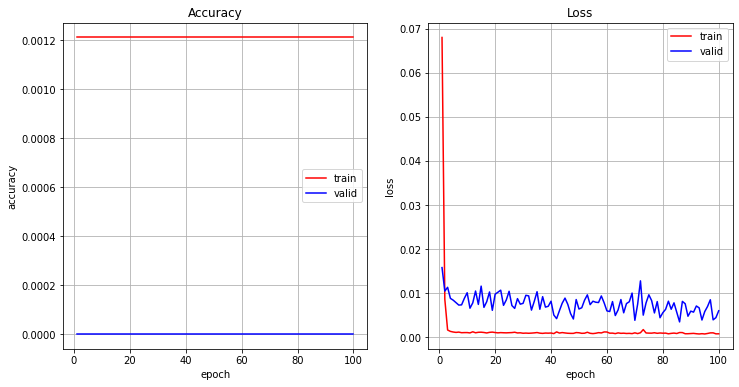

Evaluamos el modelo en train_score: [0.005853571929037571, 0.0010905124945566058]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.05778881008575098
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.05754444455072065
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


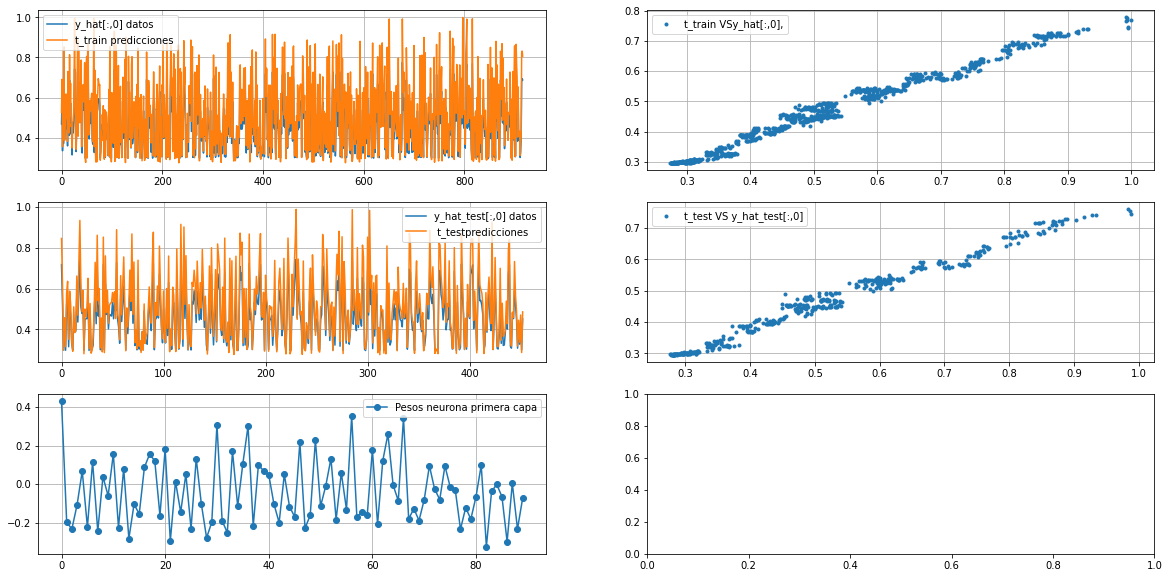

In [16]:
DAT = sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train,x_test)
model, hist = activo_caso_1(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_1_Conv2D(10, 3,MaxPooling2D(2_LSTM(5_GRU(5_Dense(1_NORM_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 10, 5, 10)         100       
                                                                 
 reshape_1 (Reshape)         (None, 50, 10)            0         
                                                                 
 gru_1 (GRU)                 (None, 50, 5)             255       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 flatten_1 (Flatten)         (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable 

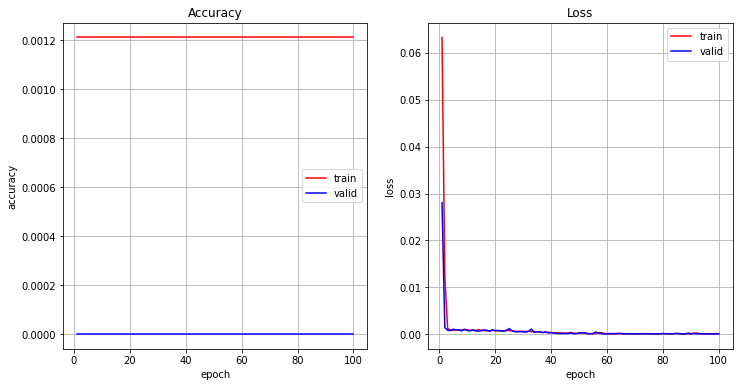

Evaluamos el modelo en train_score: [7.589494634885341e-05, 0.0010905124945566058]
29/29 [==============================] - 1s 4ms/step
Predecimos con los datos de train: 0.006231719836511113
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.006335381100466007
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


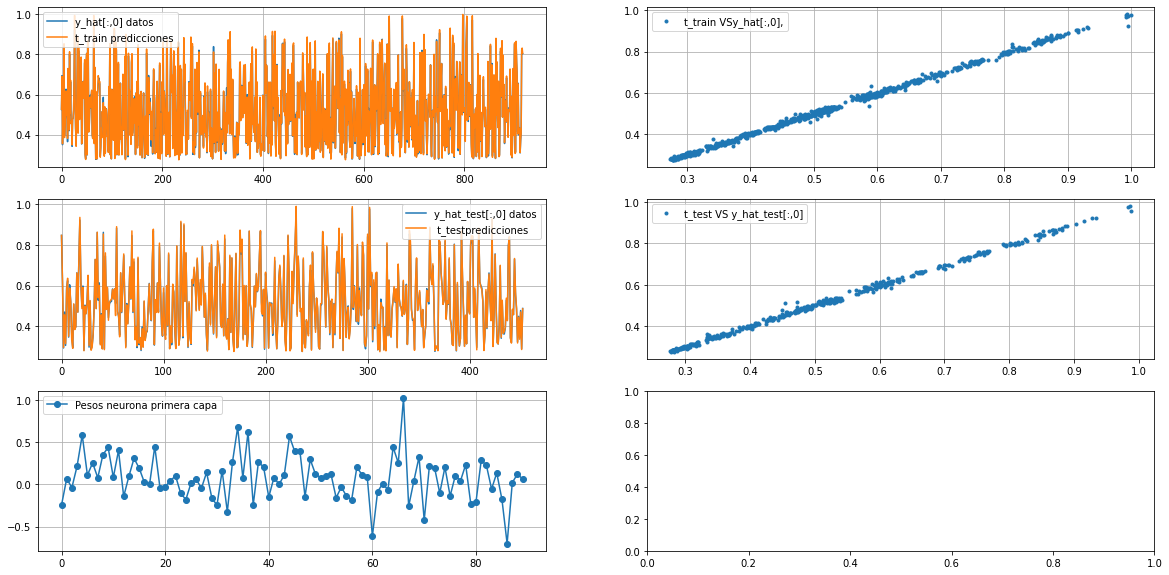

In [17]:
DAT = sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
model, hist = activo_caso_2(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_2_Conv2D(10, 3_GRU(5__LSTM(5_Dense(1_NORM_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 10, 5, 5)          50        
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 3, 5)           230       
                                                                 
 flatten_2 (Flatten)         (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 363       
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 2s 

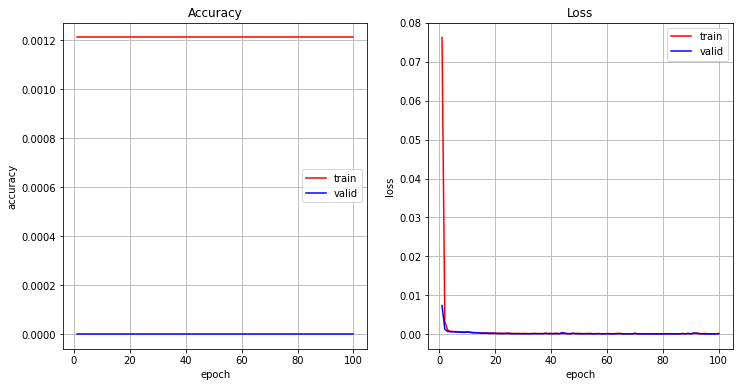

Evaluamos el modelo en train_score: [0.00020518347446341068, 0.0010905124945566058]
29/29 [==============================] - 0s 2ms/step
Predecimos con los datos de train: 0.01149147038661866
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.011886450575379815
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 2ms/step
17
(17, 54)


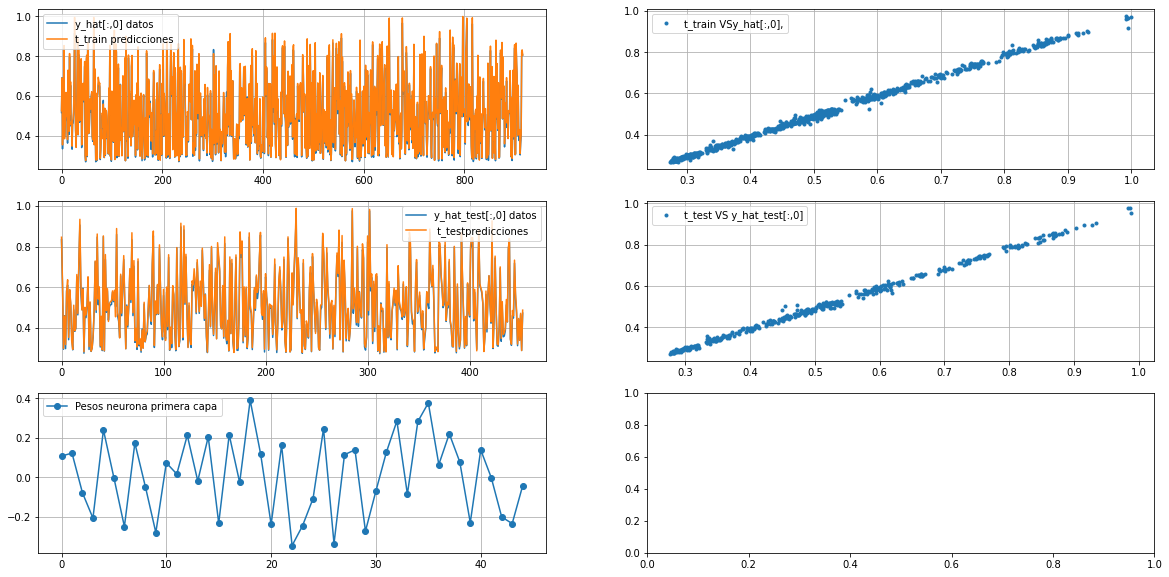

In [18]:
DAT = sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
model, hist = activo_caso_3(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_3_Conv2D(5, 3_Conv2D(5, 3_Dense(3_Dense(1_NORM_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 10, 5, 8)          80        
                                                                 
 batch_normalization (BatchN  (None, 10, 5, 8)         32        
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 10, 5, 8)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 5, 3)          603       
                                                                 
 batch_normalization_1 (Batc  (None, 10, 5, 3)         12        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 10, 5, 3)         

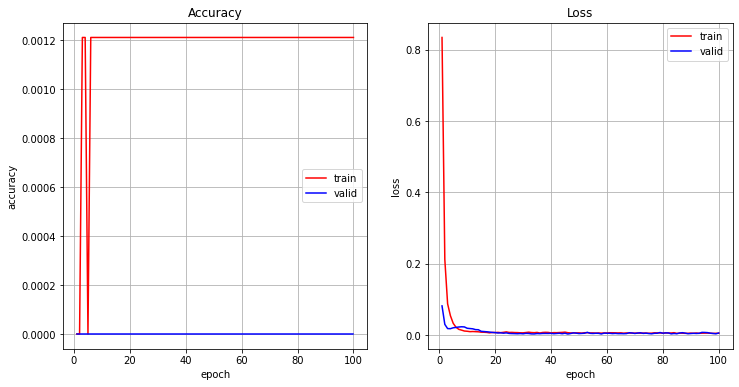

Evaluamos el modelo en train_score: [0.005916723050177097, 0.0010905124945566058]
29/29 [==============================] - 0s 2ms/step
Predecimos con los datos de train: 0.0640996477368863
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.06349063467233378
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 2ms/step
17
(17, 54)


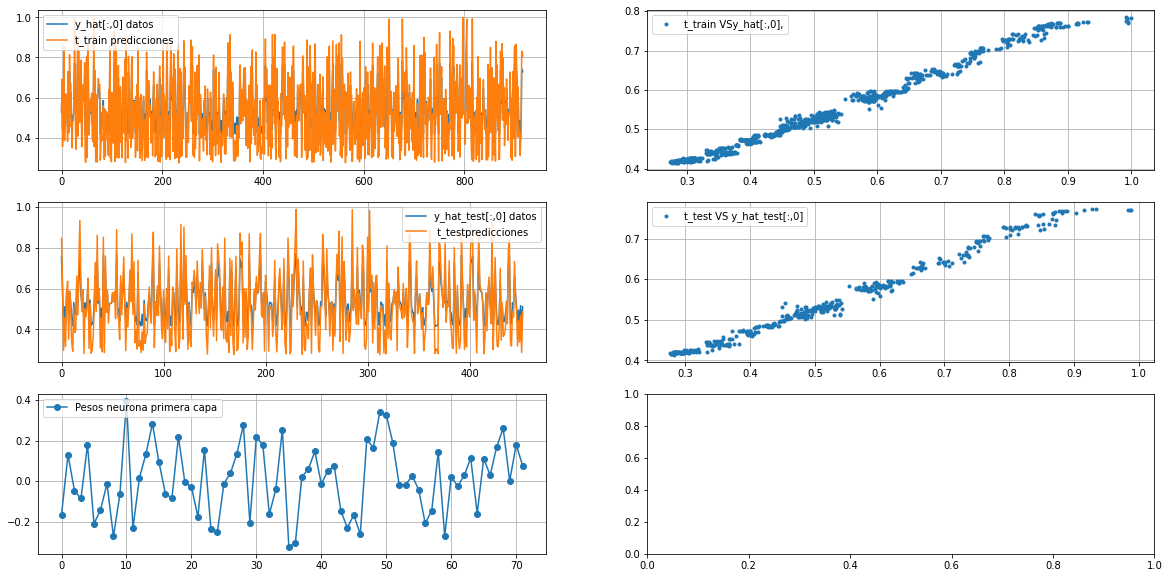

In [19]:
DAT = sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
model, hist = activo_caso_4(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_4_Conv2D(8_Conv2D(3_Conv2D(3_Dense(1_NORM_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 10, 5, 10)         100       
                                                                 
 activation_1 (Activation)   (None, 10, 5, 10)         0         
                                                                 
 dropout_4 (Dropout)         (None, 10, 5, 10)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 2, 10)         0         
 2D)                                                             
                                                                 
 reshape_2 (Reshape)         (None, 10, 10)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 5)             320       
                                                      

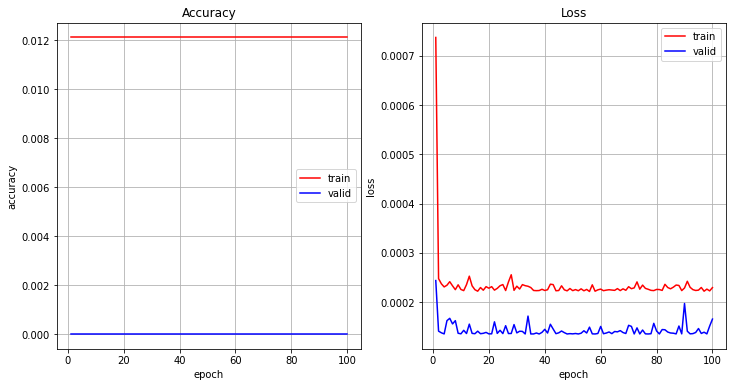

Evaluamos el modelo en train_score: [0.00023804577358532697, 0.010905125178396702]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.010879923514816845
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422259
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.010782014108247149
 La media de error en la prediccion en test es: 0.009271483187945668
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


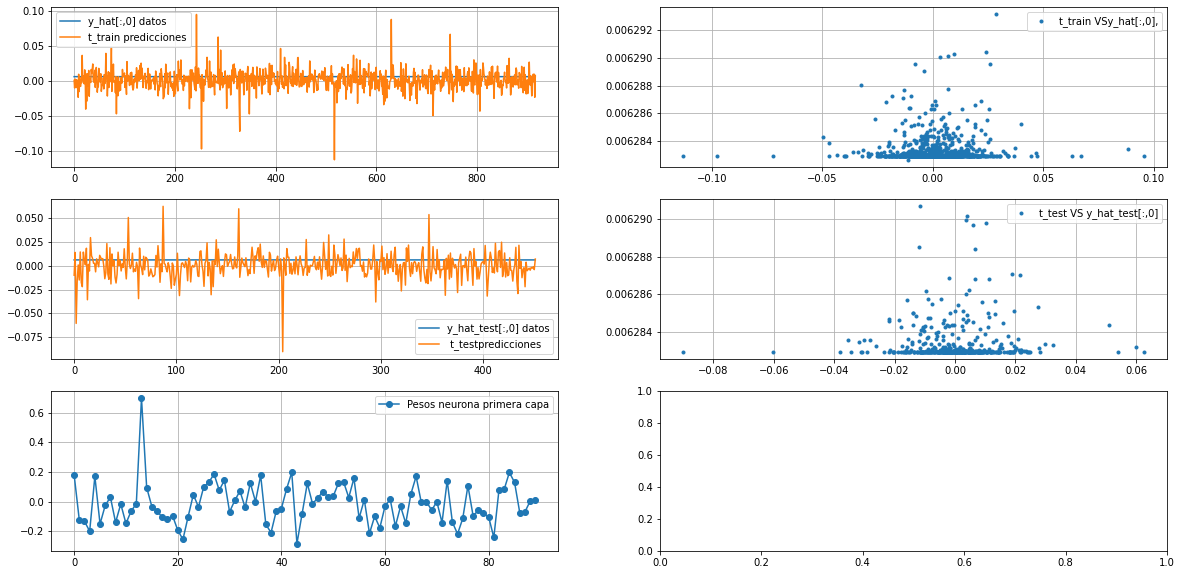

In [20]:
DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
model, hist = activo_caso_1(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_1_Conv2D(10, 3,MaxPooling2D(2_LSTM(5_GRU(5_Dense(1_CON_RETORNO_LOG'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 10, 5, 10)         100       
                                                                 
 reshape_3 (Reshape)         (None, 50, 10)            0         
                                                                 
 gru_3 (GRU)                 (None, 50, 5)             255       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 flatten_5 (Flatten)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable 

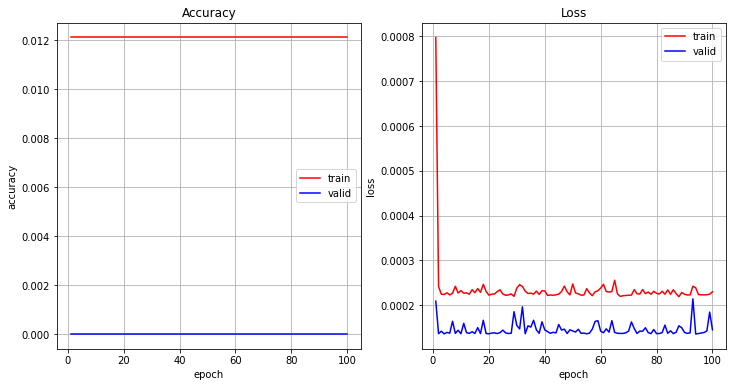

Evaluamos el modelo en train_score: [0.00021958519937470555, 0.010905125178396702]
29/29 [==============================] - 1s 4ms/step
Predecimos con los datos de train: 0.010226633750344667
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422259
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.009455268476396288
 La media de error en la prediccion en test es: 0.009271483187945668
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


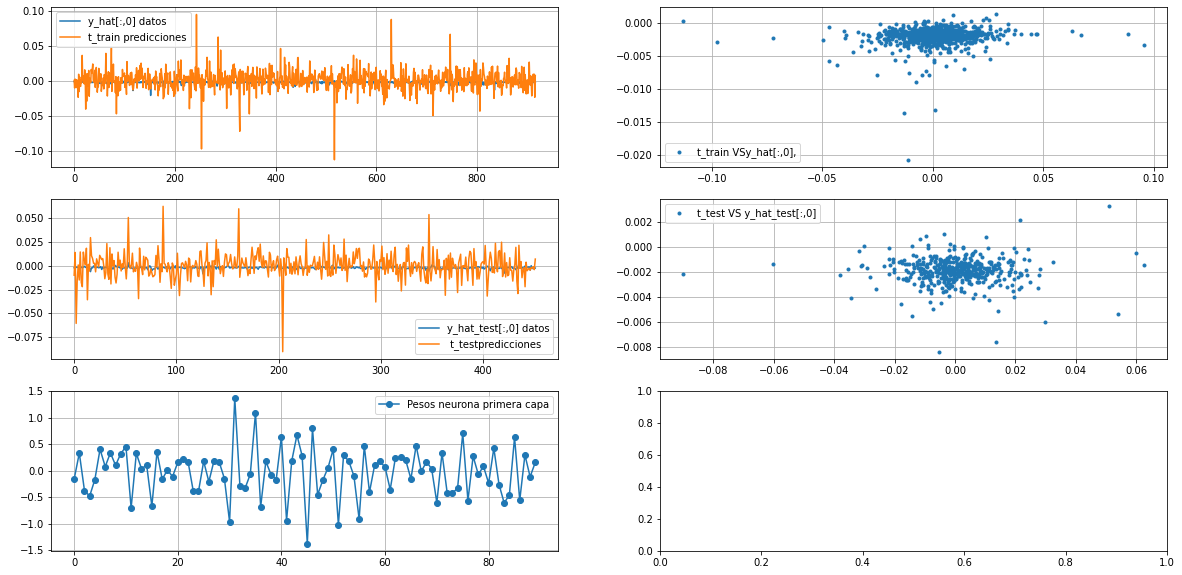

In [21]:
DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
model, hist = activo_caso_2(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_2_Conv2D(10, 3_GRU(5__LSTM(5_Dense(1_CON_RETORNO_LOG'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 10, 5, 5)          50        
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 3, 5)           230       
                                                                 
 flatten_6 (Flatten)         (None, 120)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 363       
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 2s 

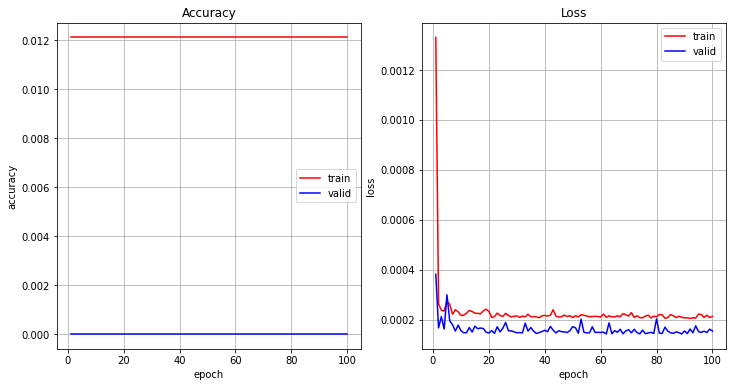

Evaluamos el modelo en train_score: [0.00019974813039880246, 0.010905125178396702]
29/29 [==============================] - 0s 2ms/step
Predecimos con los datos de train: 0.009913132807093607
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422259
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.010567304331707824
 La media de error en la prediccion en test es: 0.009271483187945668
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 2ms/step
17
(17, 54)


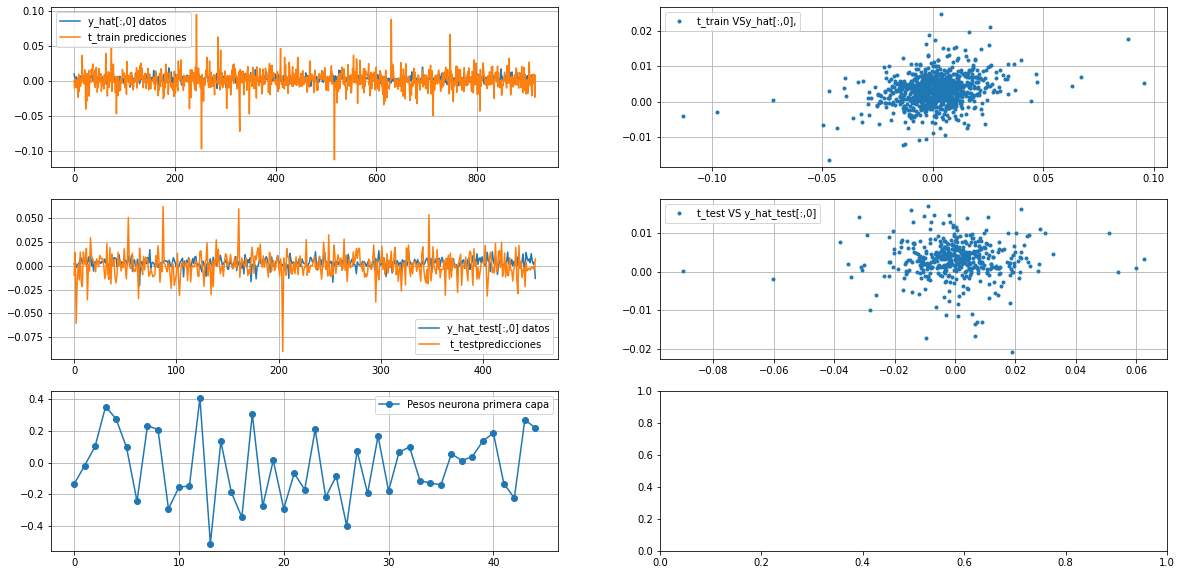

In [22]:
DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
model, hist = activo_caso_3(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_3_Conv2D(5, 3_Conv2D(5, 3_Dense(3_Dense(1_CON_RETORNO_LOG'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-8-e8229f156f9f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-8-e8229f156f9f>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 10, 5, 8)          80        
                                                                 
 batch_normalization_3 (Batc  (None, 10, 5, 8)         32        
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 10, 5, 8)          0         
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 5, 3)          603       
                                                                 
 batch_normalization_4 (Batc  (None, 10, 5, 3)         12        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 10, 5, 3)         

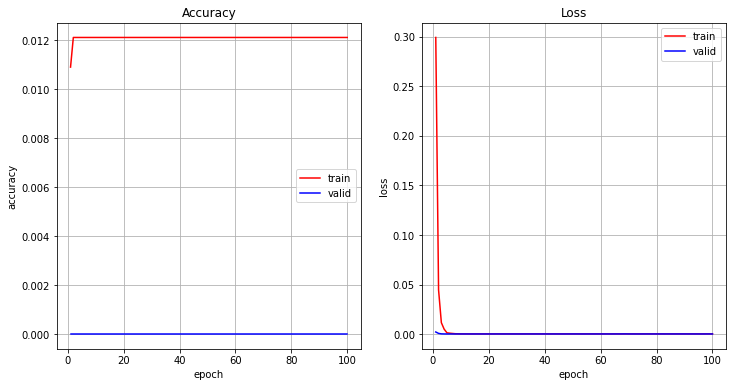

Evaluamos el modelo en train_score: [0.000219309949898161, 0.010905125178396702]
29/29 [==============================] - 0s 2ms/step
Predecimos con los datos de train: 0.010048063844654747
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422259
15/15 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.009449880764387018
 La media de error en la prediccion en test es: 0.009271483187945668
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 2ms/step
17
(17, 54)


In [ ]:
DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train, x_test = reshape_para_trabajar_conv2D (x_train, x_test)
model, hist = activo_caso_4(x_train, x_test, t_train, t_test)
model_title = 'EJ_6_CASO_4_Conv2D(8_Conv2D(3_Conv2D(3_Dense(1_CON_RETORNO_LOG'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

In [ ]:
# SI COMPRAMOS EL LOSS DE TRAIN Y TEST ENTRE LOS EJEMPLOS DEL EJ 5(CONV1)
# CON LOS DEL EJ 6(CONV2):
# 'EJ_5_CASO_1_GRU(10_LSTM(5_Conv1D(5, 3_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN: [0.00011785412061726674, 0.0010905124945566058]
# SCORE DE TEST: [0.00014753123105037957, 0.0]

# 'EJ_5_CASO_2_GRU(2_LSTM(1_Conv1D(2, 3_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN: [0.030766544863581657, 0.0010905124945566058]
# SCORE DE TEST: [0.02991551160812378, 0.0]

# 'EJ_5_CASO_3_Conv1D(10,3_GRU(5_LSTM(5_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN:[8.03745788289234e-05, 0.0010905124945566058]
# SCORE DE TEST:[8.373150922125205e-05, 0.0]

# 'EJ_5_CASO_4_Conv1D(2,3_GRU(1_LSTM(2_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN: [0.00010235523950541392, 0.0010905124945566058]
# SCORE DE TEST: [0.00011603369057411328, 0.0]

# 'EJ_5_CASO_1_GRU(10_LSTM(5_Conv1D(5, 3_Dense(1_CON_RETORNO_LOG.'
# SCORE DE TRAIN: [0.0002330134011572227, 0.010905125178396702]
# SCORE DE TEST: [0.0001935433829203248, 0.006637168116867542]

# 'EJ_5_CASO_2_GRU(2_LSTM(1_Conv1D(2, 3_Dense(1_CON_RETORNO_LOG.'
# SCORE DE TRAIN: [0.00021523657778743654, 0.010905125178396702]
# SCORE DE TEST: [0.0001862900098785758, 0.006637168116867542]

# 'EJ_5_CASO_3_Conv1D(10,3_GRU(5_LSTM(5_Dense(1_CON_RETORNO_LOG'
# SCORE DE TRAIN: [0.00023119556135497987, 0.010905125178396702]
# SCORE DE TEST: [0.0002740350610110909, 0.006637168116867542]

# 'EJ_5_CASO_4_Conv1D(2,3_GRU(1_LSTM(2_Dense(1_CON_RETORNO_LOG'
# SCORE DE TRAIN: [0.00021051449584774673, 0.010905125178396702]
# SCORE DE TEST: [0.00018180790357291698, 0.006637168116867542]

# VS

# 'EJ_6_CASO_1_Conv2D(10, 3,MaxPooling2D(2_LSTM(5_GRU(5_Dense(1_NORM_SIN_REG.LOG.'
# SCORE DE TRAIN: [0.004177717957645655, 0.0010905124945566058]
# SCORE DE TEST: [0.004182077012956142, 0.0]

# 'EJ_6_CASO_2_Conv2D(10, 3_GRU(5__LSTM(5_Dense(1_NORM_SIN_REG.LOG.'
# SCORE DE TRAIN: [0.0003565317892935127, 0.0010905124945566058]
# SCORE DE TEST: [0.0003763201821129769, 0.0]

# 'EJ_6_CASO_3_Conv2D(5, 3_Conv2D(5, 3_Dense(3_Dense(1_NORM_SIN_REG.LOG.'
# SCORE DE TRAIN: [0.0003237404744140804, 0.0010905124945566058]
# SCORE DE TEST: [0.00032812010613270104, 0.0]

# 'EJ_6_CASO_4_Conv2D(8_Conv2D(3_Conv2D(3_Dense(1_NORM_SIN_REG.LOG.'
# SCORE DE TRAIN: [0.003527463646605611, 0.0010905124945566058]
# SCORE DE TEST: [0.0035028879065066576, 0.0]

# 'EJ_6_CASO_1_Conv2D(10, 3,MaxPooling2D(2_LSTM(5_GRU(5_Dense(1_CON_RETORNO_LOG'
# SCORE DE TRAIN: [0.0002085683954646811, 0.010905125178396702]
# SCORE DE TEST: [0.00019363590399734676, 0.006637168116867542]

# 'EJ_6_CASO_2_Conv2D(10, 3_GRU(5__LSTM(5_Dense(1_CON_RETORNO_LOG'
# SCORE DE TRAIN: [0.00021936665871180594, 0.010905125178396702]
# SCORE DE TEST: [0.0002074755320791155, 0.006637168116867542]

# 'EJ_6_CASO_3_Conv2D(5, 3_Conv2D(5, 3_Dense(3_Dense(1_CON_RETORNO_LOG'
# VSCORE DE TRAIN: [0.0002036226069321856, 0.010905125178396702]
# VSCORE DE TEST: [0.0002039812970906496, 0.006637168116867542]

# 'EJ_6_CASO_4_Conv2D(8_Conv2D(3_Conv2D(3_Dense(1_CON_RETORNO_LOG'
# SCORE DE TRAIN: [0.00021413566719274968, 0.010905125178396702]
# SCORE DE TEST: [0.00018300634110346437, 0.006637168116867542]

# LOSS DE TEST EJ 5:
# - NORMALIZADO_SIN_RETORNO_LOG: 0.00014753123105037957 0.02991551160812378   8.373150922125205e-05  0.00011603369057411328
# - CON_RETORNO_LOG:             0.0001935433829203248  0.0001862900098785758 0.0002740350610110909  0.00018180790357291698
# LOSS DE TEST EJ 6:
# - NORMALIZADO_SIN_RETORNO_LOG: 0.004182077012956142   0.0003763201821129769 0.00032812010613270104 0.0035028879065066576
# - CON_RETORNO_LOG:             0.00019363590399734676 0.0002074755320791155 0.0002039812970906496  0.00018300634110346437

# CON_RETORNO_LOG, EJ 5 Y 6 DAN LOSS DE TEST PARECIDOS. DEBERIA HABER PUESTO SEMILLAS PARA
# DETERMINAR CUAL ERA LIGERAMTNE MEJOR. BUENO; PARA LA PROXIMA.
# RESPECTO A NORMALIZADO_SIN_RETORNO_LOG , EJ 5 Y 6 AVECES DAN VALORES DISPARES SI SE COMPARAN
